In [1]:
import os, pickle, jax
os.chdir('..' if os.getcwd().endswith("/eugene") else '.')

import pandas as pd
from eugene.vae import VAE
from flax import nnx
import matplotlib.pyplot as plt

In [2]:
model_file = 'eugene/latest.pickle'

In [3]:
with open(model_file, 'rb') as file:
    model_dict = pickle.load(file)

model = VAE(rngs=nnx.Rngs(0))

model.opts = model_dict['opts']
model.stats = model_dict['stats']
nnx.update(model, model_dict['state'])

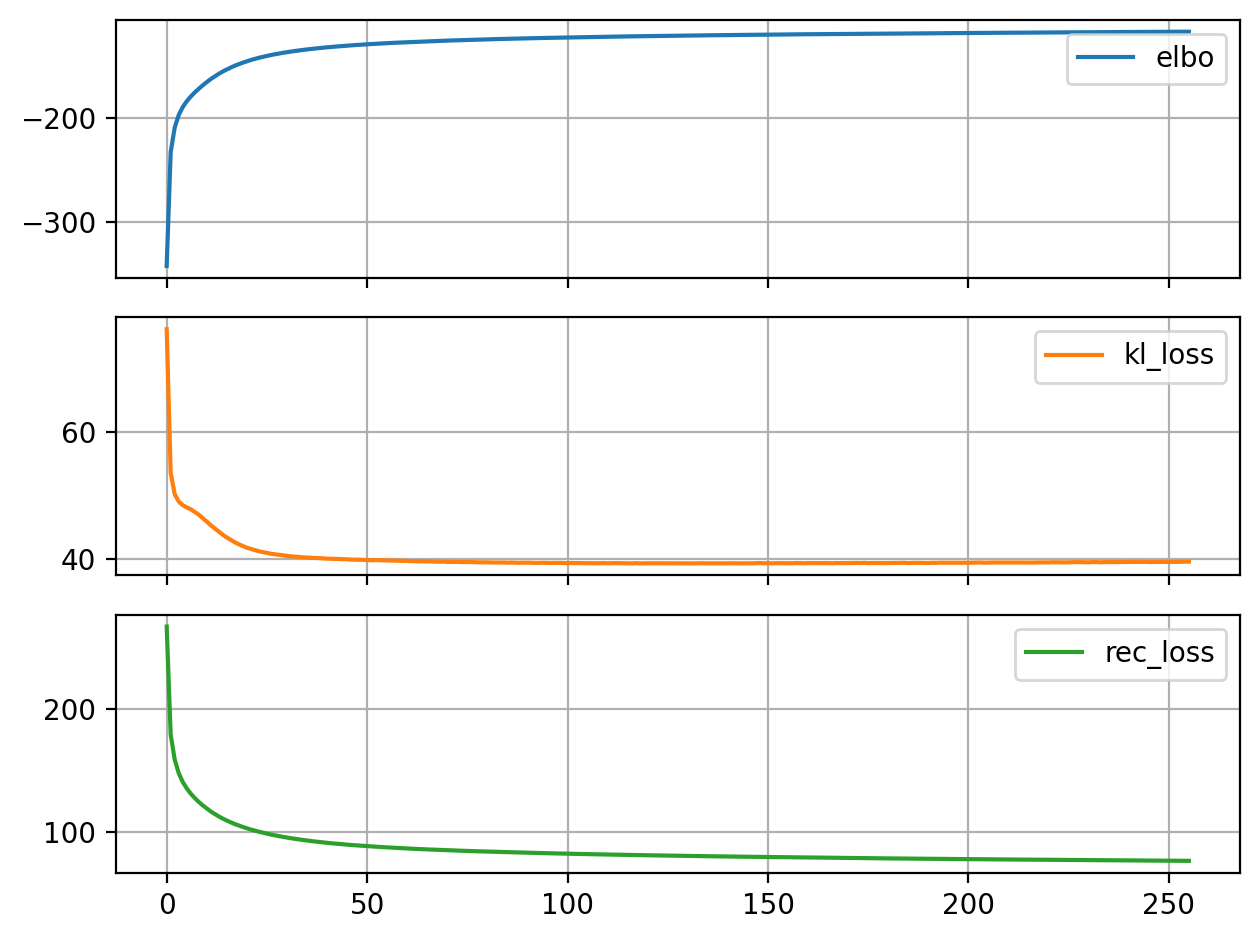

In [4]:
df = pd.DataFrame(model.stats['train'])
df.plot(subplots=True);

In [7]:
df[124:]

,elbo,kl_loss,rec_loss
124,-120.610344,39.379299,81.231049
125,-120.577530,39.400372,81.177170
126,-120.500275,39.376579,81.123703
127,-120.462914,39.381233,81.081688
128,-120.416466,39.391266,81.025208
...,...,...,...
251,-116.638397,39.617279,77.021111
252,-116.614754,39.602840,77.011917
253,-116.603401,39.627949,76.975449
254,-116.606728,39.649414,76.957314


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.014573047..0.8799203].


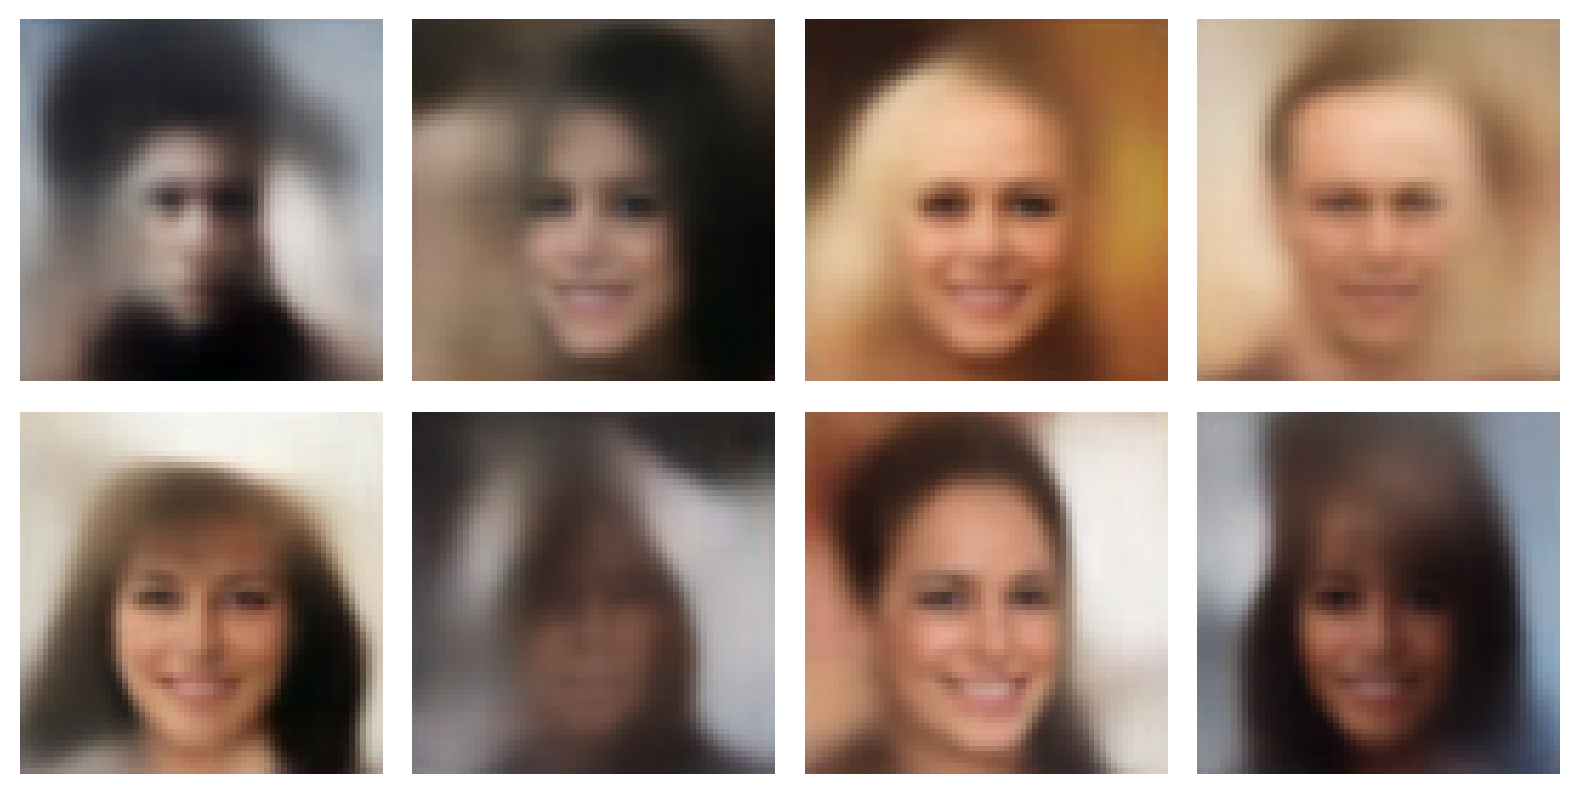

In [6]:
z = jax.random.normal(model.rngs(), (8, model.opts.dz))
x = model.decode(z).transpose(0, 2, 1, 3)
# plot x as an image grid
plt.figure(figsize=(8, 8))
for i in range(8):
    plt.subplot(4, 4, i+1)
    plt.imshow(x[i], cmap='gray')
    plt.axis('off')


# plt.imshow(x[0]., cmap='gray')
# plt.grid(False)